# Linear Regression Refresher

Optimize the orientation of a line that best fits coupled/correlated parameters.

- Simple Linear Regression: Uses 1 dependent (y) variable and 1 independent (x) variable.

- Formula: y = m * x + b
- Goal: Optimize the slop (m) and y-intercept (b)

## Example

Housing prices across the United States

- **First, I need to import the Library**

In [1]:
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split

- **Then I read the data from csv file**

In [2]:
df = pd.read_csv('usa_housing.csv')

In [3]:
# conda install posix 

! head -2 usa_housing.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


- **I will remane the headers since they are long**

In [4]:
housing = pd.read_csv('usa_housing.csv', header=1, 
                      names=['income', 'age', 'rooms', 'bedrooms', 'population', 'price', 'address'])
housing

,income,age,rooms,bedrooms,population,price,address
0,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
1,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
2,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
3,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386
4,80175.754159,4.988408,6.104512,4.04,26748.428425,1.068138e+06,"06039 Jennifer Islands Apt. 443\nTracyport, KS..."
...,...,...,...,...,...,...,...
4994,60567.944140,7.830362,6.137356,3.46,22837.361035,1.060194e+06,USNS Williams\nFPO AP 30153-7653
4995,78491.275435,6.999135,6.576763,4.02,25616.115489,1.482618e+06,"PSC 9258, Box 8489\nAPO AA 42991-3352"
4996,63390.686886,7.250591,4.805081,2.13,33266.145490,1.030730e+06,"4215 Tracy Garden Suite 076\nJoshualand, VA 01..."
4997,68001.331235,5.534388,7.130144,5.44,42625.620156,1.198657e+06,USS Wallace\nFPO AE 73316


## Observables (Feature)

- Features (X): These are the independent variables used as input for the model.
  - **income, age, rooms, bedrooms, population**
- Target Observable (y): The dependent variable that the model is trying to predict
  - **price**

In [5]:
feature_list = ['income', 'age', 'rooms', 'bedrooms', 'population']

### Visualize the data

Plot the features versus price (X vs y) to see the ralationship.

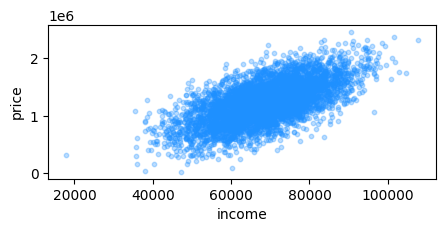

In [7]:
fig = plt.figure(figsize=(11, 8))

fig.subplots_adjust(wspace=0.2, hspace=0.5)

for count, feature in enumerate(feature_list):
    ax = fig.add_subplot(3, 2, count+1) # first position cannot be zero

    ax.set_xlabel(xlabel=feature)
    ax.set_ylabel(ylabel='price')

    ax.scatter(housing[feature], housing['price'], color='dodgerblue', s=10, alpha=0.3)

    plt.show()

## Linear Regression on a Single Feature (one-dimensional)

- Input (X): A single column (Area number of rooms)
- Output (y): The single target variable (Price)

**Linear model that finds a best-fit line: y = m * x + b, where x is the number of rooms**

In [8]:
feature = housing['rooms'].values
target = housing['price'].values

## Training and Testing

Using scikit-learn function:

- train_test_split(*arrays, test_size=None, train_size=None, random_state=None, suffle=True, stratify=None)

- Primary Arguments:
    - test_size
    - train_size
    - random_state
      
- Returns:
    - Xtrain (Features for Training)
    - Xtest (Features for Testing)
    - ytrain (Target for Training)
    - ytest (Target for Testing)
      
- Type: returns **a list of numpy.ndarrays**

  
- Documentaion: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [9]:
feature_train, feature_test, target_train, target_test = train_test_split(feature, target,
                                                                          test_size=0.25, train_size=0.75,
                                                                          random_state=1)

We should have 25% of the data being researved for the future testing.

In [10]:
print(f'Type of the training features: {type(feature_train)}')
print(f'Leangth of the training data: {len(target_train)}')
print(f'Leangth of the test data: {len(target_test)}')

print(f'Fraction of data used for the test data set: '
      f' {len(target_test) / (len(target_train) + len(target_test)) :0.2f}')

Type of the training features: <class 'numpy.ndarray'>
Leangth of the training data: 3749
Leangth of the test data: 1250
Fraction of data used for the test data set:  0.25


### Visualize the training and test data

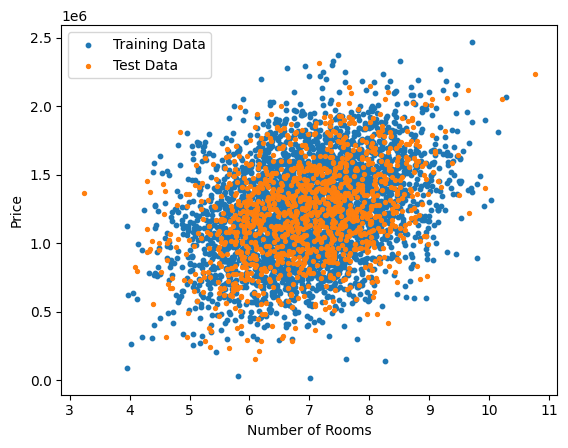

In [11]:
plt.figure()

plt.scatter(feature_train, target_train, s=10, label='Training Data')
plt.scatter(feature_test, target_test, s=8, label='Test Data')

plt.xlabel(xlabel='Number of Rooms')
plt.ylabel(ylabel='Price')

plt.legend(loc='best')

plt.show()

# References

[1] Dr. Karl Kirschner , Github link: https://github.com/karlkirschner/Scientific_Programming_Course.git, **(Last access: 12.01.2026)** 